In [1]:
# import and install all dependencies


In [2]:
import cv2
import mediapipe as mp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



# keypoint mp holistic

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils


In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR )
    return image, results

In [5]:
def  draw_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic. FACEMESH_TESSELATION)
    # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_landmarks_new(image, results):
     # 1. Draw face landmarks
        ''' mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic. FACEMESH_TESSELATION, 
                                mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                               )'''
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 ) 

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        '''mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )'''

In [8]:
cap = cv2.VideoCapture(0)   
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()  
        image, results= mediapipe_detection(frame, holistic)
        print(results)
        image = cv2.resize(image, (700,400))
        draw_landmarks_new(image, results)
        cv2.imshow("Camera_Screen", image)
        if cv2.waitKey(10) & 0xff == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [9]:
results.pose_landmarks


landmark {
  x: 0.75260127
  y: 0.5151086
  z: -1.5484297
  visibility: 0.9986382
}
landmark {
  x: 0.7953587
  y: 0.44584402
  z: -1.4749405
  visibility: 0.99591315
}
landmark {
  x: 0.8177663
  y: 0.44967598
  z: -1.4750153
  visibility: 0.99610037
}
landmark {
  x: 0.83917207
  y: 0.45362523
  z: -1.475187
  visibility: 0.99527663
}
landmark {
  x: 0.7169412
  y: 0.433976
  z: -1.5012844
  visibility: 0.9972294
}
landmark {
  x: 0.6902477
  y: 0.43124247
  z: -1.500408
  visibility: 0.99783194
}
landmark {
  x: 0.66398454
  y: 0.42987263
  z: -1.5010085
  visibility: 0.9977824
}
landmark {
  x: 0.867904
  y: 0.47813883
  z: -0.897476
  visibility: 0.9946432
}
landmark {
  x: 0.6251532
  y: 0.44934705
  z: -0.98516905
  visibility: 0.9986038
}
landmark {
  x: 0.79185396
  y: 0.6119637
  z: -1.3248079
  visibility: 0.9989257
}
landmark {
  x: 0.69801015
  y: 0.6012791
  z: -1.3507669
  visibility: 0.999239
}
landmark {
  x: 0.97655123
  y: 0.80528253
  z: -0.36876935
  visibility: 0.

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)


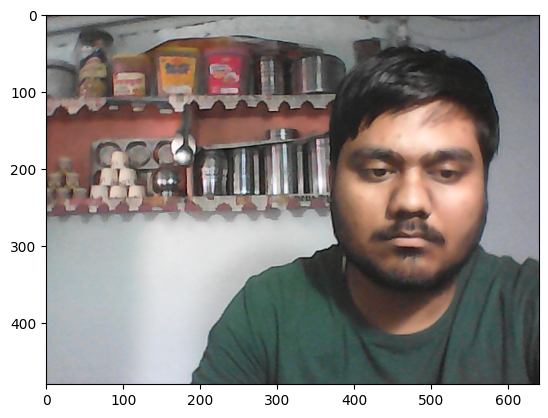

In [12]:

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


In [13]:
frame[0].shape

(640, 3)

# extract keypoits values

In [14]:
results.right_hand_landmarks


In [15]:
results.pose_landmarks

landmark {
  x: 0.75260127
  y: 0.5151086
  z: -1.5484297
  visibility: 0.9986382
}
landmark {
  x: 0.7953587
  y: 0.44584402
  z: -1.4749405
  visibility: 0.99591315
}
landmark {
  x: 0.8177663
  y: 0.44967598
  z: -1.4750153
  visibility: 0.99610037
}
landmark {
  x: 0.83917207
  y: 0.45362523
  z: -1.475187
  visibility: 0.99527663
}
landmark {
  x: 0.7169412
  y: 0.433976
  z: -1.5012844
  visibility: 0.9972294
}
landmark {
  x: 0.6902477
  y: 0.43124247
  z: -1.500408
  visibility: 0.99783194
}
landmark {
  x: 0.66398454
  y: 0.42987263
  z: -1.5010085
  visibility: 0.9977824
}
landmark {
  x: 0.867904
  y: 0.47813883
  z: -0.897476
  visibility: 0.9946432
}
landmark {
  x: 0.6251532
  y: 0.44934705
  z: -0.98516905
  visibility: 0.9986038
}
landmark {
  x: 0.79185396
  y: 0.6119637
  z: -1.3248079
  visibility: 0.9989257
}
landmark {
  x: 0.69801015
  y: 0.6012791
  z: -1.3507669
  visibility: 0.999239
}
landmark {
  x: 0.97655123
  y: 0.80528253
  z: -0.36876935
  visibility: 0.

In [16]:
len(results.pose_landmarks.landmark)

33

In [17]:
results.left_hand_landmarks

In [18]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [ ]:
results.right_hand_landmarks

In [ ]:
len(results.right_hand_landmarks.landmark)

In [ ]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(33*4)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
# face = np.array([[res.x, res.y, res.z,] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [ ]:
pose.shape

In [ ]:
lh.shape

In [ ]:
rh

In [19]:
def extract_keypoint(results):
    # pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    # face = np.array([[res.x, res.y, res.z,] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([lh, rh])

In [20]:
extract_keypoint(results).shape

(126,)

In [21]:
result_test = extract_keypoint(results)

In [22]:
np.save('key_xyz123', result_test)

In [23]:
np.load('key_xyz123.npy')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

# setup folder for data collection

In [24]:
DATA_PATH = os.path.join('SIGN_DATA_ABC')
 
actions = np.array(['A', 'B','C','D','E','F', 'G', 'H', 'I', 'J', 'K', 'L'])  

no_sequences = 30

sequence_length = 30

In [ ]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# collecting data

In [25]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                image, results = mediapipe_detection(frame, holistic)
                image = cv2.resize(image, (700,400))
                draw_landmarks_new(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    
                    cv2.imshow('Camera_Screen', image)
                    cv2.waitKey(200)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                   
                    cv2.imshow('Camera_Screen', image)
                
                keypoints = extract_keypoint(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()